In [65]:
from google.colab import drive ##mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
%cd /content/drive/MyDrive/deep assignment 1/ ##giving path for the files 
!pwd

/content/drive/MyDrive/deep assignment 1
/content/drive/MyDrive/deep assignment 1


In [67]:
## libraries not all were used as i was reading many documentation to try different methods.

from __future__ import print_function, division 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import plotly.express as px
import time
import os
# from collections import Counter
# import copy
import itertools
import glob
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import torchvision
# from torchvision.datasets import ImageFolder
from torchvision import models, transforms
# from torchvision.utils import make_grid

from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torch.optim import lr_scheduler
# from torch.autograd import Variable
import torch
import gc
import datetime


# Setting Manual Seed for Recreation of results
torch.manual_seed(42)
np.random.seed(0)

In [68]:
def GetImagesFromFolder(PATH,Class_Folder,ext): ## getting all the path and reading each folder as list thn converting into array.
    """
    This module can be used to import image data. It also takes care of resizing the images to 240x240 Pixels
    """
    images = [Image.open(file).convert('RGB').resize((240,240),resample=Image.LANCZOS) for e in ext for file in glob.glob(PATH+Class_Folder+'/*.' + e)] 
    print(f"Found {len(images)} in folder {Class_Folder}")
    np.random.shuffle(images)
    return images,np.array([Class_Folder for i in range(len(images))])

In [69]:
DATA_PATH = '/content/drive/MyDrive/deep assignment 1/' ##listing all the datas of the following formats.
FOLDERS = os.listdir(DATA_PATH)
ext = ['jpg','jpeg']
le = LabelEncoder().fit(FOLDERS)##using ENCODER TO encode labels into binary

In [70]:
start_time = datetime.datetime.now().replace(microsecond=0) ##counting the number of images in each folder

ALL_IMAGES,ALL_LABELS = [],[]
images_population ={}

for Class_Folder in FOLDERS:
    IMAGES,LABELS = GetImagesFromFolder(DATA_PATH,Class_Folder,ext)
    images_population[Class_Folder] = LABELS.shape[0]
    ALL_IMAGES.extend(IMAGES)
    ALL_LABELS.extend(LABELS)
    
end_time = datetime.datetime.now().replace(microsecond=0)

print(end_time - start_time)

Found 301 in folder cloudy
Found 215 in folder rain
Found 253 in folder shine
Found 357 in folder sunrise
Found 0 in folder rain87.jpg
0:00:15


In [71]:
##plotting population of data
df = pd.DataFrame.from_dict({'Name':[i for i in images_population.keys()],'#Images':[i for i in images_population.values()]})

colors = ['white', 'red', 'darkorange', 'lightgreen']
fig = px.pie(df,values='#Images',names='Name', hole=.3, width=600, height=600,opacity=.80)
fig.update_traces(hoverinfo='label+percent',textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide', title={'text': 'Population of Various Classes','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split


In [73]:
##getiing corrupted files
import os
from os import listdir
from PIL import Image
count=0
for filename in os.listdir('/content/drive/MyDrive/Datasets/weather dataset'):
    if filename.endswith('jpg'):
     try:
      img=Image.open('/content/drive/MyDrive/Datasets/weather dataset'+filename)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+filename)
         count=count+1
         print(count)
    if filename.endswith('jpeg'):
     try:
      img=Image.open('/content/drive/MyDrive/Datasets/weather dataset'+filename)
      img.verify()
     except(IOError,SyntaxError)as e:
         print('Bad file  :  '+filename)
         count=count+1
         print(count)

Bad file  :  cloudy202.jpg
1
Bad file  :  cloudy217.jpg
2
Bad file  :  cloudy219.jpg
3
Bad file  :  cloudy216.jpg
4
Bad file  :  cloudy214.jpg
5
Bad file  :  cloudy172.jpg
6
Bad file  :  cloudy175.jpg
7
Bad file  :  cloudy215.jpg
8
Bad file  :  cloudy211.jpg
9
Bad file  :  cloudy191.jpg
10
Bad file  :  cloudy220.jpg
11
Bad file  :  cloudy189.jpg
12
Bad file  :  cloudy204.jpg
13
Bad file  :  cloudy197.jpg
14
Bad file  :  cloudy183.jpg
15
Bad file  :  cloudy241.jpg
16
Bad file  :  cloudy24.jpg
17
Bad file  :  cloudy270.jpg
18
Bad file  :  cloudy273.jpg
19
Bad file  :  cloudy246.jpg
20
Bad file  :  cloudy233.jpg
21
Bad file  :  cloudy264.jpg
22
Bad file  :  cloudy243.jpg
23
Bad file  :  cloudy267.jpg
24
Bad file  :  cloudy231.jpg
25
Bad file  :  cloudy262.jpg
26
Bad file  :  cloudy276.jpg
27
Bad file  :  cloudy269.jpg
28
Bad file  :  cloudy25.jpg
29
Bad file  :  cloudy26.jpg
30
Bad file  :  cloudy268.jpg
31
Bad file  :  cloudy236.jpg
32
Bad file  :  cloudy266.jpg
33
Bad file  :  cloudy237

In [74]:
df.shape

(5, 2)

In [75]:
from sklearn.model_selection import train_test_split
TRAIN_IMAGES, X_val_test, TRAIN_LABELS, y_val_test = train_test_split(ALL_IMAGES, ALL_LABELS, test_size=0.30, random_state=42,stratify=ALL_LABELS)
VAL_IMAGES, TEST_IMAGES, VAL_LABELS, TEST_LABELS =  train_test_split(X_val_test, y_val_test, test_size=0.30, random_state=42,stratify=y_val_test)

In [76]:
import tensorflow as tf

In [77]:
##making model without augmentation
num_classes = 4

# defining model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), input_shape = (250 , 250 , 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(256 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(num_classes , activation = 'softmax')])

In [78]:
##setting hyperparameters
model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(lr = 0.001) , metrics = 'accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [79]:
##watching trainable parameters and the shapes of the layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 246, 246, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 82, 82, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 78, 78, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 128)       204928    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 128)       

In [80]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [81]:
base_dir =  '/content/drive/MyDrive/deep assignment 1'
folders = os.listdir(base_dir)
print(folders)

['cloudy', 'rain', 'shine', 'sunrise', 'rain87.jpg']


In [82]:
# labeling files with Image Data Generator

train_datagen = ImageDataGenerator(
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(250 , 250),
    batch_size= 80,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(250, 250),
    batch_size= 80,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 790 images belonging to 4 classes.
Found 336 images belonging to 4 classes.


In [83]:
num_classes = 4

# defining model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), input_shape = (250 , 250 , 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(256 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(num_classes , activation = 'softmax')])

In [84]:
model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(lr = 0.001) , metrics = 'accuracy')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 246, 246, 32)      2432      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 82, 82, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 78, 78, 64)        51264     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 128)       204928    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [85]:
# training model
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 100)

Epoch 1/100
10/10 [==============================] - 14s 1s/step - loss: 16.3037 - accuracy: 0.4304 - val_loss: 0.9204 - val_accuracy: 0.5833
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 0.9009 - accuracy: 0.6063 - val_loss: 1.0092 - val_accuracy: 0.5357
Epoch 3/100
10/10 [==============================] - 11s 1s/step - loss: 0.7348 - accuracy: 0.7025 - val_loss: 0.8509 - val_accuracy: 0.7440
Epoch 4/100
10/10 [==============================] - 10s 1s/step - loss: 0.6177 - accuracy: 0.7823 - val_loss: 0.5907 - val_accuracy: 0.8006
Epoch 5/100
10/10 [==============================] - 11s 1s/step - loss: 0.5886 - accuracy: 0.7797 - val_loss: 0.7501 - val_accuracy: 0.7292
Epoch 6/100
10/10 [==============================] - 10s 1s/step - loss: 0.5683 - accuracy: 0.8051 - val_loss: 0.5774 - val_accuracy: 0.7738
Epoch 7/100
10/10 [==============================] - 10s 1s/step - loss: 0.4946 - accuracy: 0.8177 - val_loss: 0.5349 - val_accuracy: 0.8065
Epoch 8/100


In [86]:
##testing accuracy before augmentation
score = model.evaluate(test_generator, steps= len_test_generator//1, verbose=1)
print('\n', 'Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



1126/1126 [==============================] - 11s 10ms/step - loss: 4.3978 - accuracy: 0.2407

 Test accuracy: 0.2406749576330185


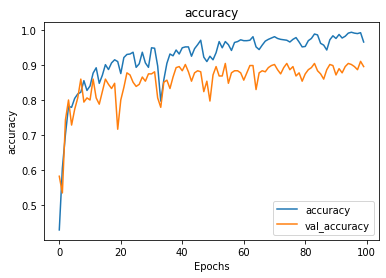

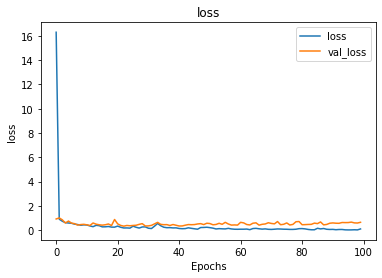

In [87]:
##plotting accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# augmenting training samples

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1,  # randomly shift images vertically
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(250 , 250),
    batch_size= 80,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(250, 250),
    batch_size= 80,
    class_mode='categorical',
    subset='validation') # set as validation data
datagen_test = ImageDataGenerator(rescale=1./255,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True)

test_generator = datagen_test.flow_from_directory(
        base_dir,
        target_size=(250, 250),
        batch_size=32,
        class_mode='categorical')

In [89]:
# Generated Labels
labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}


In [90]:
# setting seed and clearing session
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [91]:
num_classes = 4

# defining model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), input_shape = (250 , 250 , 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(256 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(num_classes , activation = 'softmax')])

In [92]:
model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(lr = 0.001) , metrics = 'accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 246, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 82, 82, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 78, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [93]:
# training model with augmented data
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



Epoch 1/100
10/10 [==============================] - 28s 3s/step - loss: 1.0227 - accuracy: 0.5177 - val_loss: 0.7647 - val_accuracy: 0.6815
Epoch 2/100
10/10 [==============================] - 26s 3s/step - loss: 0.6605 - accuracy: 0.7494 - val_loss: 0.5576 - val_accuracy: 0.7857
Epoch 3/100
10/10 [==============================] - 25s 3s/step - loss: 0.4679 - accuracy: 0.8456 - val_loss: 0.5158 - val_accuracy: 0.8244
Epoch 4/100
10/10 [==============================] - 26s 3s/step - loss: 0.3953 - accuracy: 0.8747 - val_loss: 0.6102 - val_accuracy: 0.8036
Epoch 5/100
10/10 [==============================] - 26s 3s/step - loss: 0.3670 - accuracy: 0.8861 - val_loss: 0.6898 - val_accuracy: 0.7679
Epoch 6/100
10/10 [==============================] - 26s 3s/step - loss: 0.3373 - accuracy: 0.8924 - val_loss: 0.3562 - val_accuracy: 0.8661
Epoch 7/100
10/10 [==============================] - 26s 3s/step - loss: 0.3145 - accuracy: 0.8975 - val_loss: 0.3956 - val_accuracy: 0.8810
Epoch 8/100
1

In [94]:
# defining callback for early stopping
class My_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self , epochs , logs = {}):
        if(logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.91):
            print('\n stopping training')
            self.model.stop_training = True
            
callbacks = My_callback()

In [95]:
# training model with early stopping approach
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 100,
          callbacks = [callbacks] )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



Epoch 1/100
10/10 [==============================] - 27s 3s/step - loss: 0.0363 - accuracy: 0.9848 - val_loss: 0.7126 - val_accuracy: 0.8810
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9861
 stopping training
10/10 [==============================] - 26s 3s/step - loss: 0.0534 - accuracy: 0.9861 - val_loss: 0.4429 - val_accuracy: 0.9137


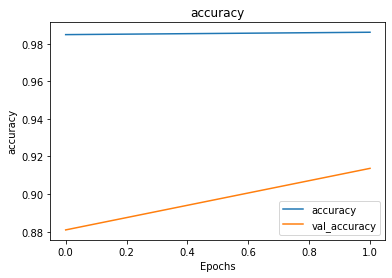

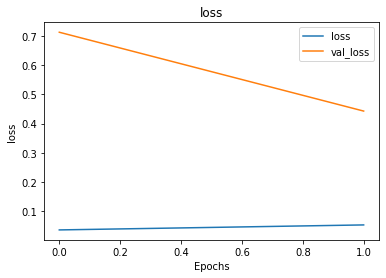

In [106]:
##plotting accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [107]:
class WeatherDataset(Dataset):
    def __init__(self, ImageData, Target, transform=None):
        self.ImageData = ImageData
        self.Target = torch.LongTensor(le.transform(Target))
        self.transform = transform

    def __getitem__(self, index):
        x = self.ImageData[index]
        y = self.Target[index]
        if self.transform:
            x = Image.fromarray(np.uint8(np.array(self.ImageData[index]))) # Memory Efficient way
            x = self.transform(x)
        return x, y
    def __len__(self):
        return len(self.ImageData)

In [108]:
def get_mean_std(loader):
    # VAR[X] = E[X**2] - E[X]**2
    channels_sum, channels_squared_sum, num_batches = 0,0,0
    
    for data,_ in loader:
        channels_sum +=torch.mean(data,dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
    
    mean = channels_sum/num_batches
    std = (channels_squared_sum/num_batches - mean**2)**0.5
    return mean,std

In [109]:
batch_size = 25
transform = transforms.Compose([transforms.Resize((230,230)),transforms.ToTensor()])
dataset = WeatherDataset(TRAIN_IMAGES, TRAIN_LABELS, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=4)
mean,std = get_mean_std(loader)
print(f"Data loader has:\n*\tmean= {mean.tolist()}\n*\tstd= {std.tolist()}")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Data loader has:
*	mean= [0.4607250392436981, 0.455312579870224, 0.4479173719882965]
*	std= [0.2713695466518402, 0.25006288290023804, 0.29057905077934265]


In [110]:
transform = {'train':transforms.Compose([transforms.ColorJitter(),
                                         transforms.RandomRotation(30),
                                         transforms.Resize((240,240)),
                                         transforms.RandomResizedCrop(230),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=mean,std=std),#transforms.RandomErasing()
                                        ]),
             'val':transforms.Compose([transforms.Resize((230,230)),
                                      transforms.ToTensor()]),
             
             'test':transforms.Compose([transforms.Resize((230,230)),
                                      transforms.ToTensor()])}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


batch_size = {'train':25, 'val':50,'test':50}

dataset_classes = ['Cloudy','Rain','Shine','Sunrise']


image_datasets = {'train': WeatherDataset(TRAIN_IMAGES, TRAIN_LABELS, transform=transform['train']),
                  'val':   WeatherDataset(VAL_IMAGES, VAL_LABELS, transform=transform['val']),
                  'test':  WeatherDataset(TEST_IMAGES, TEST_LABELS, transform=transform['test'])
}


dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val','test']}

dataloaders = {indx: torch.utils.data.DataLoader(image_datasets[indx], batch_size=batch_size[indx], num_workers=4, pin_memory=True, shuffle=True)
              for indx in batch_size.keys()}

print("Size for Dataset:\n\t* Train: %d\n\t* Valid: %d\n\t* Test: %d"%(dataset_sizes['train'],dataset_sizes['val'],dataset_sizes['test']))

Size for Dataset:
	* Train: 788
	* Valid: 236
	* Test: 102


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



In [111]:
def imshow(img):
    # Convert from tensor image
    plt.imshow(np.transpose(img, (1,2,0)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping in

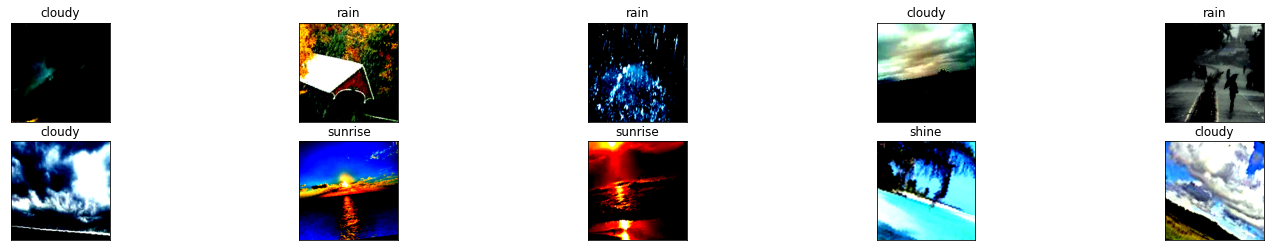

In [112]:
dataiter = iter(dataloaders['train'])
images, labels = dataiter.next()
# Convert images to numpy for display
images = images.numpy()

# Plot the images in the batch
fig = plt.figure(figsize=(25, 4))

labels = le.inverse_transform([i.item() for i in labels])

# Display 10 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(labels[idx])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



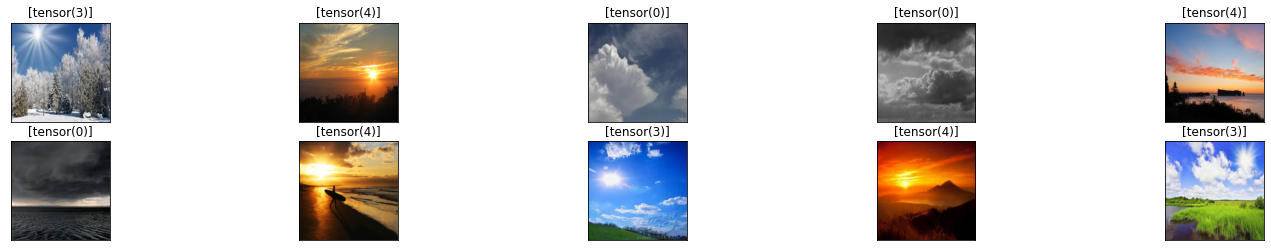

In [113]:
dataiter = iter(dataloaders['test'])
images, labels = dataiter.next()
# Convert images to numpy for display
images = images.numpy()

# Plot the images in the batch
fig = plt.figure(figsize=(25, 4))

# Display 20 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title([labels[idx]])

In [114]:
# testing model
def prediction(test_path):
    img = image.load_img(test_path , target_size = (250 , 250))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0

    plt.title('Image')
    plt.axis('off')
    plt.imshow(img.squeeze())

    predict = model.predict(img[np.newaxis , ...])
    predicted_class = labels[np.argmax(predict[0] , axis = -1)]

    print('Prediction Value: ' , np.max(predict[0] , axis = -1))
    print("Classified:",predicted_class)

In [115]:
# Generated Labels
labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}


Prediction Value:  0.54074764
Classified: cloudy


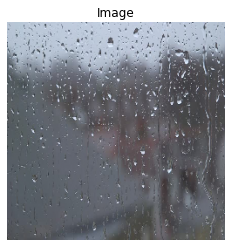

In [119]:
test_path = '/content/drive/MyDrive/deep assignment 1/rain87.jpg'
prediction(test_path)

In [120]:
len_test_generator = test_generator.samples

In [121]:
score = model.evaluate(test_generator, steps= len_test_generator//1, verbose=1)
print('\n', 'Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



1126/1126 [==============================] - 12s 10ms/step - loss: 0.1258 - accuracy: 0.9680

 Test accuracy: 0.9680284261703491
